<a href="https://colab.research.google.com/github/TSkinne4/MAT-421/blob/main/Module_G_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simpson's Rule

Simpson's Rule works by taking two sub intervals, $[x_{i-1},x_i]$ and $[x_i,x_{i+1}]$ and then defining a quadratic using the points $(x_{i-1},f(x_{i-1}))$, $(x_{i},f(x_{i}))$, and $(x_{i+1},f(x_{i+1}))$ and integrating over the quadratic. We define the quadratuc by using Lagrange polynomials. Defining h as the length of a sub-interval, we get that
  $$P_i(x)= \frac{(x-x_i)(x-x_{i+1})}{2h^2}f(x_{i-1})-\frac{(x-x_{i-1})(x-x_{i+1})}{h^2}f(x_i)$+\frac{(x-x_{i-1})(x-x_i)}{2h^2}f(x_{i+1}).$$
  With this, we see that
  $$\int_{x_{i-1}}^{x_{i+1}}P_i(x)dx = \frac{h}{3}\left(f(x_{i-1})+4f(x_i)+f(x_{i+1})\right).$$
  By regrouping terms we get that
$$\int_a^bf(x)dx\approx \frac{h}{3}\left[f(x_0)+4\left(\sum_{i=1,i\text{ odd}}^{n-1}f(x_i)\right)+2\left(\sum_{i=2,i\text{ even}}^{n-2}f(x_i)\right)+f(x_n))\right].$$
Note that for Simpson's rule, we will need an odd number of points. Using Taylor series, we can see that we get that 
$$\frac{f(x_{i-1})+4f(x_i)+f(x_{i+1})}{6} = f(x_i) + \frac{h^2}{6}f''(x_i) + \frac{h^4}{72}f''''(x_i)+\dots$$. Therefore, we will get that
  $$f(x_i) = \frac{f(x_{i-1})+4f(x_i)+f(x_{i+1})}{6} - \frac{h^2}{6}f''(x_i) - \frac{h^4}{72}f''''(x_i)+\mathcal{O}(h^4).$$
  From this, we get that 
  $$\begin{align*}
    \int_{x_{i-1}}^{x_{i+1}}f(x)dx &= \int_{x_{i-1}}^{x_{i+1}}\left(f(x_i)+f'(x_i)(x-x_i)+\frac{f''(x_i)(x-x_i)^2}{2!}+\frac{f'''(x_i)(x-x_i)^3}{3!}+\frac{f''''(x_i)(x-x_i)^4}{4!}+\dots\right)\\
    &= 2hf(x_i) + \frac{h^3}{3}f''(x_i) + \mathcal{O}(h^5)\\
    &= 2h\left(\frac{f(x_{i-1})+4f(x_i)+f(x_{i+1})}{6} - \frac{h^2}{6}f''(x_i) - \frac{h^4}{72}f''''(x_i)+\mathcal{O}(h^4)\right) + \frac{h^3}{3}f''(x_i) + \mathcal{O}(h^5)\\
    &= \frac{h}{3}\left(f(x_{i-1})+4f(x_i)+f(x_{i+1})\right)+\mathcal{O}(h^5).
  \end{align*}$$
Thus, over the entire interval, we expect an error of $\mathcal{O}(h^4)$. The code shows how varying the numner of points changes the error in the integral


Text(0.5, 1.0, 'Error vs h for $e^x$ from 0 to 2 ')

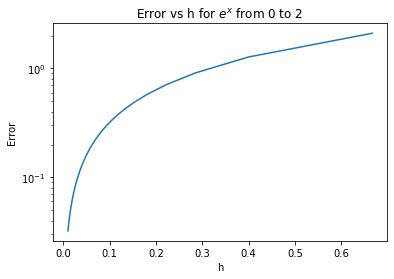

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 201
left = 0
right = 2
f = lambda x : np.exp(x)
exact = np.exp(2)-1
h_list = []
error_list = []


for n in np.arange(3,N,2):
  h = (right-left)/n
  h_list.append(h)
  x = np.linspace(left,right,n)
  func = f(x)
  I = func[0]+func[-1]
  for i in range(1,n,2):
    I+=4*func[i]
  for i in range(2,n-1,2):
    I+=2*func[i]
  I = I*h/3
  error_list.append(np.abs(exact-I))
plt.semilogy(h_list,error_list)
plt.xlabel("h")
plt.ylabel("Error")
plt.title("Error vs h for $e^x$ from 0 to 2 ")





One of the benefits of Python is that it has a large library of integrators that have already been developed which we can use, such as the ones in the scipy.integrate package.

In [8]:
import scipy.integrate as sci

f = lambda x : x**4+3*x**3

x = np.linspace(0,2,100)
func = f(x)

I = sci.trapz(func,x)

exact = 2**5/5+3*2**4/4
print(f'Numerical: {I}\nExact: {exact}')

Numerical: 18.40231267807716
Exact: 18.4
